# Analiza danych erupcji wulkanów

dane ze strony https://volcano.si.edu/

##### Mikołaj Marton Kacper Müller
###### z pomocą: mgr. inż. Michał Wilkosz

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

sns.set() 
sns.set_theme(style="whitegrid")

In [3]:
dane=pd.read_csv('raw_data.csv', header=1)
eruptions_data=dane[['Eruption Number','Volcano Name','Eruption Category','VEI','Start Year','Start Month','Start Day','End Year','End Month','End Day']]


kolumny=dane['Evidence Method (dating)'].str.split(': ',expand=True)
kolumny=kolumny.rename(columns={0: "Evidence Type", 1: "Evidence Method"})
eruptions_data=eruptions_data.join(kolumny)
eruptions_data['Evidence Type'].fillna('Uncertain',inplace=True)
eruptions_data['Evidence Method'].fillna('Unspecified',inplace=True)

eruptions_data=eruptions_data.set_index('Eruption Number')


eruptions_data=eruptions_data[eruptions_data['Eruption Category']!='Discredited Eruption']
eruptions_data=eruptions_data[eruptions_data['VEI'].notna()]


eruptions_data['Eruption Category']=eruptions_data['Eruption Category'].str.replace(' Eruption', '')

eruptions_data['Start Day']=eruptions_data['Start Day'].replace(0,np.nan)
eruptions_data['Start Month']=eruptions_data['Start Month'].replace(0,np.nan)
eruptions_data['End Day']=eruptions_data['End Day'].replace(0,np.nan)
eruptions_data['End Month']=eruptions_data['End Month'].replace(0,np.nan)


eruptions_data.to_csv('eruptions_data.csv')

eruptions_data.style.format(precision=0).hide(subset=eruptions_data.index[10:-10],axis=0)

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2,2022,10,21,2022,12,19,Observations,Reported
22481,Taal,Confirmed,1,2022,10,5,2022,10,29,Observations,Reported
22458,Turrialba,Confirmed,1,2022,7,17,2022,7,17,Observations,Reported
22453,Ulawun,Confirmed,2,2022,6,2,2022,6,2,Observations,Reported
22454,Raung,Confirmed,2,2022,5,14,2022,9,27,Observations,Satellite (infrared)
22445,Gaua,Confirmed,1,2022,5,3,2022,5,3,Observations,Reported
22451,Purace,Confirmed,1,2022,3,29,2022,3,29,Observations,Reported
22430,Ambrym,Confirmed,1,2022,1,25,2022,2,2,Observations,Reported
22456,Chikurachki,Confirmed,2,2022,1,17,2022,10,17,Observations,Satellite (visual)


In [4]:
big_eruptions_data=eruptions_data[eruptions_data['VEI']==7]

dfi.export(big_eruptions_data.style.format(precision=0), 'vei7.png',table_conversion='matplotlib')
big_eruptions_data.style.format(precision=0)

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
16231,Tambora,Confirmed,7,1812,nan,nan,1815,7,15,Observations,Reported
20843,Rinjani,Confirmed,7,1257,7,1,nan,nan,nan,Sidereal,Ice Core
13879,Santorini,Confirmed,7,-1610,nan,nan,nan,nan,nan,Isotopic,14C (calibrated)
20904,"Blanco, Cerro",Confirmed,7,-2300,nan,nan,nan,nan,nan,Isotopic,14C (calibrated)
16980,Kikai,Confirmed,7,-4350,nan,nan,nan,nan,nan,Isotopic,14C (uncalibrated)
20610,Crater Lake,Confirmed,7,-5680,nan,nan,nan,nan,nan,Sidereal,Ice Core
18903,Kurile Lake,Confirmed,7,-6440,nan,nan,nan,nan,nan,Isotopic,14C (calibrated)


In [5]:
most_active_data=eruptions_data['Volcano Name'].value_counts().rename_axis('Volcano').reset_index(name='Recorded eruptions')
dfi.export(most_active_data.head(10), 'najaktywniejsze.png',table_conversion='matplotlib')
most_active_data.head(10)

,Volcano,Recorded eruptions
0,"Fournaise, Piton de la",191
1,Asosan,180
2,Villarrica,152
3,Asamayama,128
4,Etna,121
5,Mauna Loa,110
6,Klyuchevskoy,104
7,Sheveluch,102
8,Gamalama,81
9,Merapi,81


In [6]:
last_eruption_data=eruptions_data.groupby(['VEI']).max('Start Year')[["Start Year"]].rename(columns={'Start Year':'Last recorded eruption'})

last_eruption_data.index=last_eruption_data.index.astype(int)
dfi.export(last_eruption_data.style.format(precision=0), 'ostatnie.png',table_conversion='matplotlib')
last_eruption_data.style.format(precision=0)

,Last recorded eruption
VEI,
0,2021
1,2022
2,2022
3,2021
4,2021
5,2021
6,1991
7,1812


In [12]:
vei_data_1=eruptions_data.groupby('VEI').count()[['Volcano Name']]


vei_data_1.rename(columns={'Volcano Name':'f'},inplace=True)

count=sum(vei_data_1['f'])
vei_data_1['cf']=vei_data_1['f'].cumsum()

vei_data_1['rf']=vei_data_1['f']/count

vei_data_1['crf']=vei_data_1['rf'].cumsum()

vei_data_1.index = vei_data_1.index.astype("int")

In [13]:
vei_data_2=eruptions_data[eruptions_data['Eruption Category']=='Confirmed'].groupby('VEI').count()[['Volcano Name']]


vei_data_2.rename(columns={'Volcano Name':'f'},inplace=True)

count=sum(vei_data_2['f'])
vei_data_2['cf']=vei_data_2['f'].cumsum()

vei_data_2['rf']=vei_data_2['f']/count

vei_data_2['crf']=vei_data_2['rf'].cumsum()

vei_data_2.index = vei_data_2.index.astype("int")

In [14]:
vei_data_3=eruptions_data[eruptions_data['Eruption Category']!='Confirmed'].groupby('VEI').count()[['Volcano Name']]


vei_data_3.rename(columns={'Volcano Name':'f'},inplace=True)

count=sum(vei_data_3['f'])
vei_data_3['cf']=vei_data_3['f'].cumsum()

vei_data_3['rf']=vei_data_3['f']/count

vei_data_3['crf']=vei_data_3['rf'].cumsum()


vei_data_3.index = vei_data_3.index.astype("int")

In [16]:
index = pd.Index([0,1,2,3,4,5,6,7], name='VEI')
cols = pd.MultiIndex.from_tuples([ ("All eruptions", "f"), 
                                  ("All eruptions", "cf"), 
                                  ("All eruptions", "rf"),
                                  ("All eruptions", "crf"),
                                  ("Confirmed Eruptions", "f"), 
                                  ("Confirmed Eruptions", "cf"), 
                                  ("Confirmed Eruptions", "rf"),
                                  ("Confirmed Eruptions", "crf"), 
                                  ("Uncertain Eruptions", "f"), 
                                  ("Uncertain Eruptions", "cf"), 
                                  ("Uncertain Eruptions", "rf"), 
                                  ("Uncertain Eruptions", "crf")])

data=pd.concat([vei_data_1,vei_data_2,vei_data_3],axis=1)


vei_data = pd.DataFrame(data.values, columns=cols,index=index)

dfi.export(vei_data.style.format({('All eruptions','rf'):'{:.4f}',('All eruptions','crf'):'{:.4f}',('Confirmed Eruptions','rf'):'{:.4f}',('Confirmed Eruptions','crf'):'{:.4f}',('Uncertain Eruptions','rf'):'{:.4f}',('Uncertain Eruptions','crf'):'{:.4f}'}, precision=0), 'zliczenia.png')
vei_data.style.format({('All eruptions','rf'):'{:.4f}',('All eruptions','crf'):'{:.4f}',('Confirmed Eruptions','rf'):'{:.4f}',('Confirmed Eruptions','crf'):'{:.4f}',('Uncertain Eruptions','rf'):'{:.4f}',('Uncertain Eruptions','crf'):'{:.4f}'}, precision=0)

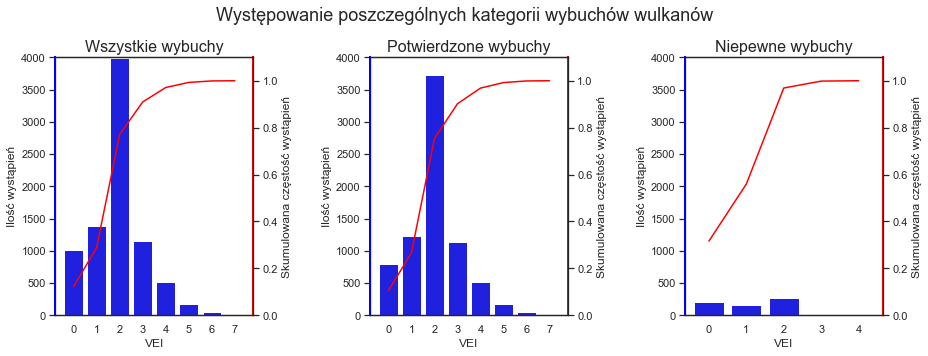

In [17]:
sns.set_style("white")
fig,ax=plt.subplots(1,3,figsize=(13,5))
fig.suptitle('Występowanie poszczególnych kategorii wybuchów wulkanów', size=18)


ax02=plt.twinx(ax[0])
ax02.set_ylim([0,1.1])
ax02.spines['left'].set_color('blue')
ax02.spines['left'].set_linewidth(2)
ax[0].set_ylim([0,4000])
ax[0].spines['right'].set_color('red')
ax[0].spines['right'].set_linewidth(2)
sns.barplot(data=vei_data['All eruptions'], x=vei_data['All eruptions'].index, y='f', ax=ax[0], color='blue')
sns.lineplot(data=vei_data['All eruptions'], x='VEI', y='crf', ax=ax02, color='red')
ax[0].set_title('Wszystkie wybuchy', size=16)
ax[0].set_ylabel('Ilość wystąpień')
ax02.set_ylabel('Skumulowana częstość wystąpień')

ax12=plt.twinx(ax[1])
ax12.set_ylim([0,1.1])
ax12.spines['left'].set_color('blue')
ax12.spines['left'].set_linewidth(2)
ax[1].set_ylim([0,4000])
ax[1].spines['right'].set_color('red')
ax[1].spines['right'].set_linewidth(2)
sns.barplot(data=vei_data['Confirmed Eruptions'], x=vei_data['Confirmed Eruptions'].index, y='f', ax=ax[1], color='blue')
sns.lineplot(data=vei_data['Confirmed Eruptions'], x='VEI', y='crf', ax=ax12, color='red')
ax[1].set_title('Potwierdzone wybuchy', size=16)
ax[1].set_ylabel('Ilość wystąpień')
ax12.set_ylabel('Skumulowana częstość wystąpień')

ax22=plt.twinx(ax[2])
ax22.set_ylim([0,1.1])
ax22.spines['left'].set_color('blue')
ax22.spines['left'].set_linewidth(2)
ax[2].set_ylim([0,4000])
ax[2].spines['right'].set_color('red')
ax[2].spines['right'].set_linewidth(2)
sns.barplot(data=vei_data['Uncertain Eruptions'], x=vei_data['Uncertain Eruptions'].index, y='f', ax=ax[2], color='blue')
sns.lineplot(data=vei_data['Uncertain Eruptions'], x='VEI', y='crf', ax=ax22, color='red')
ax[2].set_title('Niepewne wybuchy', size=16)
ax[2].set_ylabel('Ilość wystąpień')
ax22.set_ylabel('Skumulowana częstość wystąpień')


fig.tight_layout(w_pad=3)
fig.savefig("wykresy.png")
plt.show()

In [18]:
vei=sorted(eruptions_data["VEI"].unique())
vei.append("All")
eruptions_data['Evidence Method']=eruptions_data['Evidence Method'].str.strip()

data=eruptions_data
types=list(set(list(data["Evidence Type"])))
indexes=pd.DataFrame()
for i in range(len(types)):
    indexes=pd.concat([indexes,data[data["Evidence Type"]==types[i]][["Evidence Type","Evidence Method"]].drop_duplicates()])
idxx=pd.MultiIndex.from_arrays([indexes["Evidence Type"],indexes["Evidence Method"]])

evidence_data=pd.DataFrame(columns=vei,index=idxx)
tab_indexes=evidence_data.index

data_temp=eruptions_data.groupby(["VEI","Evidence Type","Evidence Method"]).count().reset_index()
data_temp=data_temp[["VEI","Evidence Type","Evidence Method","Volcano Name"]]

for j in range(len(tab_indexes)):
    res=pd.DataFrame()
    for i in range(0,8):
        res=pd.concat([res,data_temp[(data_temp["VEI"]==i)&(data_temp["Evidence Type"]==tab_indexes[j][0])&(data_temp["Evidence Method"]==tab_indexes[j][1])]])
    res.reset_index(drop=True,inplace=True)

    for i in range(0,8):
        if i not in res["VEI"].values:
             evidence_data.loc[tab_indexes[j],i]=0
        else:
             evidence_data.loc[tab_indexes[j],i]=int(res[res["VEI"]==i]["Volcano Name"].values)
        evidence_data.loc[tab_indexes[j],"All"]=sum(res["Volcano Name"].values)
evidence_data.columns.name="VEI"
evidence_data.columns=evidence_data.columns.map(lambda x: int(x) if x!= "All" else "All" )

dfi.export(evidence_data,"Methods.png", dpi=200, fontsize=8)
evidence_data_sorted=evidence_data.sort_values(axis=0,by="All",ascending=False).head(3)
dfi.export(evidence_data_sorted,"sorted_methods1.png")
dfi.export(evidence_data.sort_values(axis=0,by=7,ascending=False).head(2),"stronges.png")
evidence_data

VEI                                   0     1     2    3    4   5   6  7   All
Evidence Type Evidence Method                                                 
Isotopic      Uranium-series         24     0     0    0    0   0   0  0    24
              14C (calibrated)       41    12    49  100  105  70  21  3   401
              14C (uncalibrated)    125     7    34   54   91  41  19  1   372
              Cosmic Ray Exposure    20     1     0    0    1   0   0  0    22
              Ar/Ar                  12     1     0    0    1   1   0  0    15
              K/Ar                   10     0     0    1    0   0   0  0    11
Sidereal      Varve Count             0     1    66    8    1   0   0  0    76
              Dendrochronology        0     0     0    1    2   3   0  0     6
              Ice Core                0     0     3    0    3   0   1  2     9
Uncertain     Unspecified           204   138   271   22    1   0   0  0   636
Correlation   Magnetism              34     0     5    0    2   0   0  0    41
              Tephrochronology       71    16   122  124  103  22   5  0   463
              Anthropology            4     1     5    2    6   1   0  0    19
Radiogenic    Fission track           0     0     0    1    0   0   0  0     1
              Thermoluminescence      1     0     0    0    1   0   0  0     2
Observations  Reported              376  1200  3430  837  194  42   7  1  6087
              Satellite (infrared)    1     0     1    1    0   0   0  0     3
              Satellite (visual)      0     2     3    1    0   0   0  0     6
              Seismicity             15     0     1    0    0   0   0  0    16
              Hydrophonic            68     3     0    0    0   0   0  0    71
              Photo / Video           1     1     1    0    0   0   0  0     3
              Aviation                0     1     0    0    0   0   0  0     1

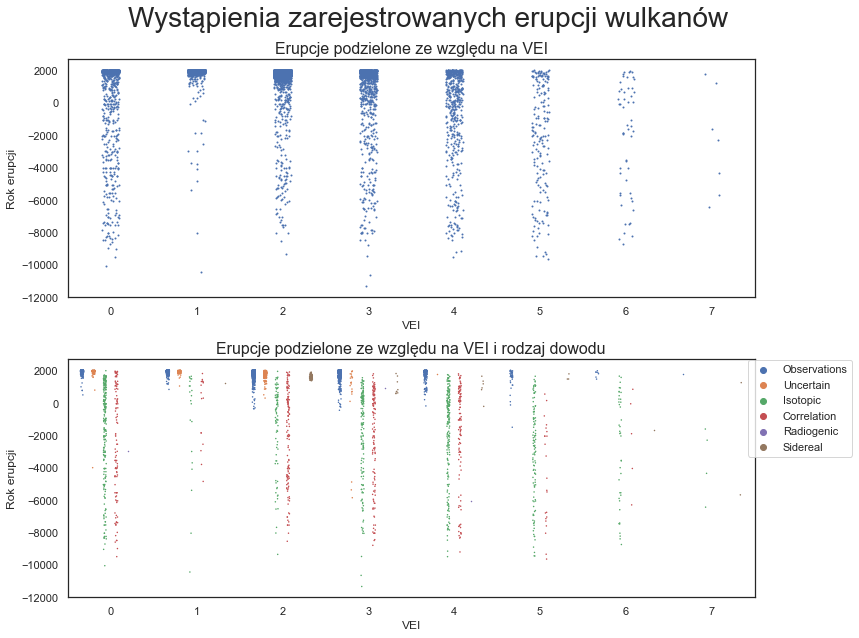

In [19]:
sns.set_style("white")
fig,ax=plt.subplots(2,1,figsize=(12,9))
fig.suptitle('Wystąpienia zarejestrowanych erupcji wulkanów', size=28)

sns.stripplot(data=eruptions_data,x="VEI",y="Start Year",s=2,ax=ax[0])
ax[0].xaxis.set_major_formatter(lambda x,pos:int(x))
ax[0].set_xlabel("VEI",size=12)
ax[0].set_ylabel("Rok erupcji",size=12)
ax[0].set_title("Erupcje podzielone ze względu na VEI",size=16)


sns.stripplot(data=eruptions_data,x="VEI",y="Start Year",s=1.5,ax=ax[1],hue="Evidence Type",dodge=True)
ax[1].xaxis.set_major_formatter(lambda x,pos:int(x))
ax[1].set_xlabel("VEI",size=12)
ax[1].set_ylabel("Rok erupcji",size=12)
ax[1].set_title("Erupcje podzielone ze względu na VEI i rodzaj dowodu",size=16)
ax[1].legend(bbox_to_anchor=(1.15, 1.02),loc="upper right")
fig.tight_layout()
fig.savefig("wykresy2.png")

plt.show()

In [20]:
eruptions_data=pd.read_csv('eruptions_data.csv')
duration = eruptions_data[['Volcano Name', 'Start Year', 'End Year']].copy()
duration['Duration (years)']=duration['End Year']-duration['Start Year']

dfi.export(duration.sort_values('Duration (years)', ascending=False).head(10).style.format(precision=0),'najdluzsze.png')
duration.sort_values('Duration (years)', ascending=False).head(10).style.format(precision=0)

,Volcano Name,Start Year,End Year,Duration (years)
6871,Yasur,1270,2022,752
6586,Stromboli,1558,1857,299
6692,Fogo,1500,1761,261
6050,Sangay,1728,1916,188
3520,Santa Maria,1922,2022,100
3187,Dukono,1933,2022,89
3165,Stromboli,1934,2022,88
3155,Sangay,1934,2011,77
5471,Kilauea,1823,1894,71
6265,Galeras,1670,1736,66


## Analiza wulkanizmu ziemskiego


Analiza dotyczy danych, gdzie najwcześniej zanotowany wybuch wulkanu odbył się w roku 11345 przed Chrystusem, a najnowsze dane dotyczą wybuchów z 2022 roku.



#### Największe wybuchy
W przeciągu tego czasu wystąpiło 7 wybuchów o najwyższej skali VEI. Najnowszy taki wybuch wystąpił w roku 1812 i jest to jedyny wybuch jaki został bezpośrednio zanotowany/zgłoszony, o wszystkich wcześniejszych wybuchach tej skali wiemy dzięki badaniom geologicznym.

![](VEI7.png)


#### Najaktywniejsze wulkany
Najaktywniejszym wulkanem w danych jest Piton de la Fournaise, z wynikiem 191. Dla ośmiu wulkanów zanotowano ponad 100 wybuchów.

![](najaktywniejsze.png)


#### Najnowsze wybuchy
Wybuchy skal 0-5 występują cały czas, natomiast skala 6 ostatni raz miała miejsce w 1991 roku, a skala 7, jak wcześniej wspomniane, w 1812.

![](ostatnie.png)




#### Najdłuższe erupcje
Najdłużej trwającą erupcją jest erupcja wulkanu Yasur. Rozpoczęła się ona (około) 1270 roku i trwa aż do dzisiaj.

![](najdluzsze.png)


#### Erupcje według wskaźnika VEI

Najwięcej odnotowanych wybuchów ma wartość 2 w skali VEI i występują one około 2.5 razy częściej niż skale 1 lub 3.
Większość z wybuchów w danych to wybuchy potwierdzone, niewielka część z całości to wybuchy niepewne.

![](zliczenia.png)

Wizualizacja powyższej tabeli:

![](wykresy.png)


### Metody pozyskiwania danych o erupcjach

Dane o erupcjach wulkanów można pozyskiwać za pomocą różnych metod.
Poniżej tabela przedstawiająca typy i metody wykrywania erupcji, wraz ze zliczeniami ile erupcji zostało 
wykrytych za pomocą poszczególnych metod, wraz z podziałem według wartości VEI:

![](Methods.png)

Jak widać w zamieszczonej poniżej tabeli, głownym źródłem dostarczania informacji o erpucjach wulkanów były po prostu naoczne obserwacje tych zjawisk. Nie licząc pozyskiwania danych z nieznanych źródeł kolejną najczęściej używaną grupą metod pozyskiwania danych o erupcjach są metody tefrochronologiczne, polegające na badaniu  warstw tefry zbudowanych z popiołów wulkanicznych.

![](sorted_methods1.png)

Jeśli chodzi o najsilniejsze erupcje o wartości VEI równej 7 to głównymi metodami informującymi nas o tych erupcjach były datowanie przy użyciu izotopu węgla 14c, oraz analiza Rdzenia lodowego, co pokazuje poniższa tabela:

![](stronges.png)


### Erupcje na przestrzeni lat

Korzystając z danych i wykresów można zauważyć, że dużo więcej erupcji zostało zarejestrowanych na przestrzeni ostatnich kilkuset lat, w porównaniu do poprzednich tysiącleci. Ma na to wpływ dużo czynników, jednak biorąc pod uwagę, że większość danych stanowią naoczne obserwacje erupcji, więc naturalnie będzie ich więcej w czasach, gdzie powszechność i wymienność informacji jest dużo większa. Można śmiało powiedzieć, że czynniki geologiczne nie miały wielkiego wpływu na zwiększenie częstotliwości rejestrowania wybuchów. 

Dobrze pokazują to poniższe wykresy, gdzie zaznaczone kolorem niebieskim na dolnym wykresie dane pochodzą z naocznych obserwacji. Widzimy dużo większą czestotliwość tych obserwacji w ostatnich kilku wiekach, natomiast w przypadku innych metod potwierdzania erupcji dane są rozłożone dużo bardziej równomiernie na przestrzeni lat.

![](wykresy2.png)